# Advance Data Analytics assignment 

# Submitted by- Anushka Srivastava

# Import the libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data

In [3]:
df=pd.read_csv(r'C:\Users\ananyya srivastava\Desktop\soil-Data-kollamcsv1.csv')

In [4]:
df.head()

,District,Block,Panchayath,SampleCode,FarmerName,f_sex,f_surveyno,f_latitude,f_longitude,f_panchayat,...,Soil_P,Soil_k,Soil_Ca,Soil_Mg,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn
0,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/741/1/320/235225,Praksh Kumar.P,male,741/1/320,8.87641,76.9707,84.0,...,7.413,237.6,305.15,10.610,0.000,1.575,0.05310,14.860,2.3090,14.80
1,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/745/12541/235226,Vasanthakumari,female,745/12541,8.87658,76.97127,84.0,...,16.980,215.6,667.00,11.300,0.000,1.859,0.02656,11.060,1.0710,47.54
2,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/745/1/2541/235227,Radhakrishnapillai,male,745/1/2541,8.87689,76.97153,84.0,...,2.631,102.3,606.00,11.675,0.000,0.790,0.04194,9.132,1.1210,39.62
3,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/745/1/235228,Chandrabose,male,745/1,8.87694,76.97161,84.0,...,14.340,298.1,1045.00,12.710,1.973,1.408,0.18174,10.180,1.2570,59.96
4,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/745/1/2539/235229,Usha Chandran,female,745/1/2539,8.87639,76.97159,84.0,...,46.869,205.7,2441.50,11.790,0.603,1.870,0.09506,14.350,0.8107,76.34


In [5]:
df.count()

District         4048
Block            4048
Panchayath       4048
SampleCode       4048
FarmerName       4048
f_sex            4048
f_surveyno       4048
f_latitude       3861
f_longitude      3861
f_panchayat      4048
f_district       4048
f_taluk          4048
f_block          4048
f_mob_no          330
SoilType         4048
crop1            4048
crop2            4048
crop3            4048
Soil_pH          4048
Soil_ec          4050
Unnamed: 20      4050
Soil_OrganicC    4050
Unnamed: 22      4050
Soil_P           4048
Soil_k           4048
Soil_Ca          4048
Soil_Mg          4048
Soil_s           4048
Soil_Zn          4048
Soil_b           4048
Soil_Fe          4048
Soil_Cu          4048
Soil_Mn          4048
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 33 columns):
District         4048 non-null object
Block            4048 non-null object
Panchayath       4048 non-null object
SampleCode       4048 non-null object
FarmerName       4048 non-null object
f_sex            4048 non-null object
f_surveyno       4048 non-null object
f_latitude       3861 non-null object
f_longitude      3861 non-null object
f_panchayat      4048 non-null float64
f_district       4048 non-null float64
f_taluk          4048 non-null float64
f_block          4048 non-null float64
f_mob_no         330 non-null float64
SoilType         4048 non-null object
crop1            4048 non-null object
crop2            4048 non-null object
crop3            4048 non-null object
Soil_pH          4048 non-null float64
Soil_ec          4050 non-null float64
Unnamed: 20      4050 non-null object
Soil_OrganicC    4050 non-null float64
Unnamed: 22      4050 non-null object
Soil_P      

In [7]:
print(df.columns.values)

['District' 'Block' 'Panchayath' 'SampleCode' 'FarmerName' 'f_sex'
 'f_surveyno' 'f_latitude' 'f_longitude' 'f_panchayat' 'f_district'
 'f_taluk' 'f_block' 'f_mob_no' 'SoilType' 'crop1' 'crop2' 'crop3'
 'Soil_pH' 'Soil_ec' 'Unnamed: 20' 'Soil_OrganicC' 'Unnamed: 22' 'Soil_P'
 'Soil_k' 'Soil_Ca' 'Soil_Mg' 'Soil_s' 'Soil_Zn' 'Soil_b' 'Soil_Fe'
 'Soil_Cu' 'Soil_Mn']


In [8]:
df.describe()

,f_panchayat,f_district,f_taluk,f_block,f_mob_no,Soil_pH,Soil_ec,Soil_OrganicC,Soil_P,Soil_k,Soil_Ca,Soil_Mg,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn
count,4048.000000,4048.0,4048.000000,4048.000000,3.300000e+02,4048.000000,4050.000000,4050.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.00000,4048.000000
mean,122.177125,2.0,6.690217,24.579792,9.384199e+09,5.846287,0.358561,1.797981,67.424614,192.167437,417.904146,24.666415,3.363671,3.217135,0.528337,49.656148,1.23289,22.079388
std,22.751969,0.0,0.737893,4.364429,9.849650e+08,0.725837,11.415572,57.194304,51.812779,231.068588,527.234144,54.907931,4.760118,5.389476,0.516771,85.566393,6.73168,28.507297
min,84.000000,2.0,5.000000,18.000000,9.495645e+08,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,98.000000,2.0,6.000000,20.000000,9.446369e+09,5.360000,0.050000,0.546000,34.193750,95.000000,98.230000,11.228750,1.260000,0.830000,0.100600,11.800000,0.42000,7.597750
50%,116.000000,2.0,7.000000,23.000000,9.605574e+09,5.860000,0.100000,0.810000,55.000000,162.000000,181.650000,16.652500,2.083000,1.560000,0.532700,20.500000,0.75000,15.310000
75%,149.000000,2.0,7.000000,30.000000,9.846952e+09,6.300000,0.170000,1.090000,85.000000,224.550000,555.375000,29.005000,3.302500,3.572500,0.820000,47.320000,1.25000,27.110000
max,157.000000,2.0,9.000000,33.000000,9.995877e+09,9.900000,725.997200,3640.461050,471.000000,5863.000000,3787.500000,3041.000000,92.200000,111.800000,5.200000,911.300000,413.50000,694.900000


In [9]:
df[['f_panchayat','f_district','f_taluk','f_block','f_mob_no']].head()

,f_panchayat,f_district,f_taluk,f_block,f_mob_no
0,84.0,2.0,9.0,18.0,NaN
1,84.0,2.0,9.0,18.0,NaN
2,84.0,2.0,9.0,18.0,NaN
3,84.0,2.0,9.0,18.0,NaN
4,84.0,2.0,9.0,18.0,NaN


# Soil columns seggregation

In [10]:

soil_col=['Soil_pH','Soil_ec','Soil_OrganicC','Soil_P','Soil_k','Soil_Ca','Soil_Mg','Soil_s',
          'Soil_Zn','Soil_b','Soil_Fe','Soil_Cu','Soil_Mn']

# Methods columns seggregation

In [11]:
methods_col=['Zinc_Method','Copper_Method','Iron_Method','Manganese_Method']

# Farmer columns seggregation

In [12]:
f_col=['FarmerName','ContactAddress','f_dateofsampling','f_sex', 'f_surveyno','f_latitude', 'f_longitude', 'f_ownership', 'f_ownername',
       'f_panchayat', 'f_pincode', 'f_district', 'f_taluk', 'f_block','f_mob_no',]

# Mean of soil column

In [13]:
df[soil_col].mean()

Soil_pH            5.846287
Soil_ec            0.358561
Soil_OrganicC      1.797981
Soil_P            67.424614
Soil_k           192.167437
Soil_Ca          417.904146
Soil_Mg           24.666415
Soil_s             3.363671
Soil_Zn            3.217135
Soil_b             0.528337
Soil_Fe           49.656148
Soil_Cu            1.232890
Soil_Mn           22.079388
dtype: float64

# Boxplot of pH in diff blocks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

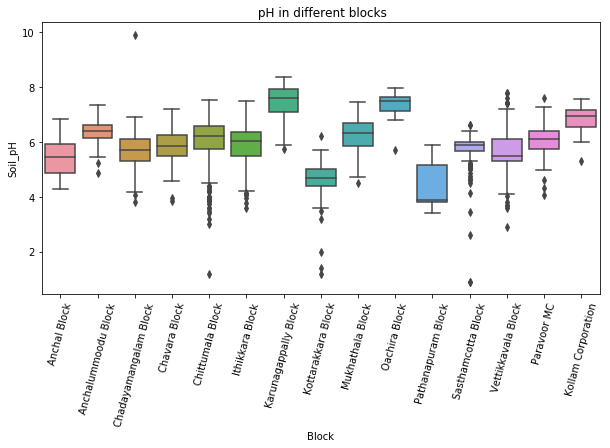

In [14]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Block',y='Soil_pH',data=df)
plt.title(" pH in different blocks")
plt.xticks(rotation=75)

# Boxplot of potassium in different blocks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

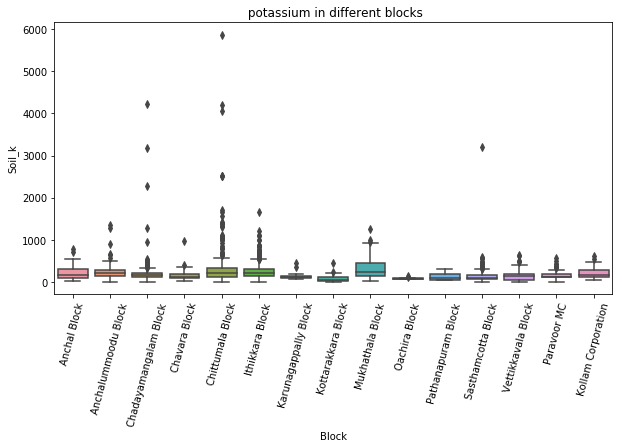

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Block',y='Soil_k',data=df)
plt.title(" potassium in different blocks")
plt.xticks(rotation=75)

# Boxplot of calcium in different blocks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

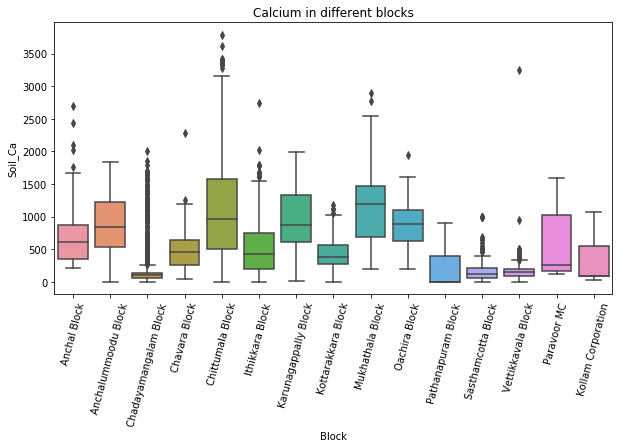

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Block',y='Soil_Ca',data=df)
plt.title("Calcium in different blocks")
plt.xticks(rotation=75)

# Boxplot of manganese in different Blocks

Text(0.5, 1.0, 'Mangnese distribution')

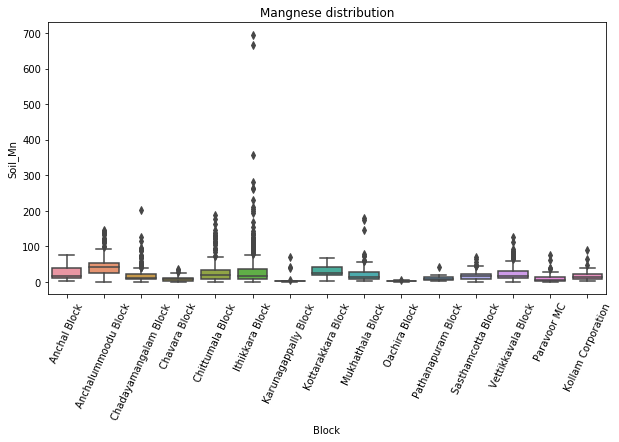

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Block',y='Soil_Mn',data=df)
plt.xticks(rotation=65)
plt.title('Mangnese distribution')

# Heatmap of Blocks and soil distribution

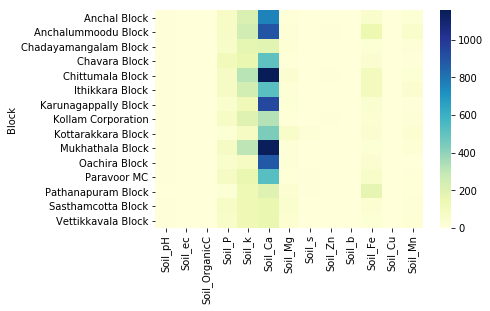

In [18]:
mean=df.groupby('Block')[soil_col].mean()
sns.heatmap(mean,cmap="YlGnBu")

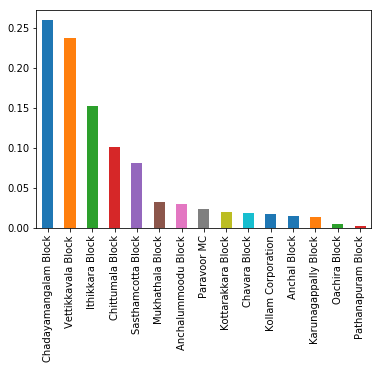

In [19]:
df['Block'].value_counts(normalize=True).plot(kind='Bar')

In [20]:

from scipy import stats

In [21]:
block_ph=df[['Block','Soil_pH']]

In [22]:
block_ph.head()

,Block,Soil_pH
0,Anchal Block,4.76
1,Anchal Block,5.67
2,Anchal Block,5.45
3,Anchal Block,5.46
4,Anchal Block,6.24


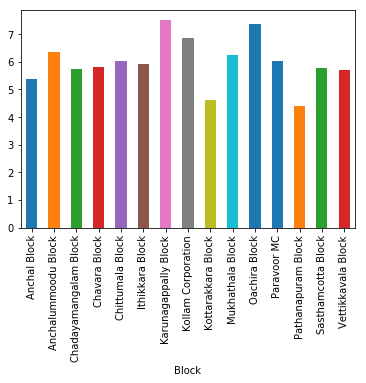

In [23]:
block_ph.groupby('Block')['Soil_pH'].mean().plot(kind='bar')

In [24]:
group_ph=block_ph.groupby('Block')

In [25]:
group_ph

In [26]:

group_ph.groups['Anchal Block']

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55],
           dtype='int64')

In [27]:
group_ph.groups['Paravoor MC']

Int64Index([3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894,
            3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905,
            3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916,
            3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927,
            3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938,
            3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949,
            3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960,
            3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971,
            3972, 3973, 3974, 3975, 3976, 3977],
           dtype='int64')

# One way annova 
Ho: The distribution of soil is same in all blocks
Ha: is different in all blocks

In [28]:
#one way anova
stats.f_oneway(group_ph.groups['Anchal Block'],
               group_ph.groups['Paravoor MC'],
               group_ph.groups['Chavara Block'],group_ph.groups['Pathanapuram Block'],group_ph.groups['Kottarakkara Block'],group_ph.groups['Ithikkara Block'],
             group_ph.groups['Karunagappally Block'],group_ph.groups['Karunagappally Block'],group_ph.groups['Sasthamcotta Block'],group_ph.groups['Chadayamangalam Block'])

F_onewayResult(statistic=4876.983338800215, pvalue=0.0)

# As p value is less than 0.5 thus we reject null hypothesis

In [29]:

block_ca=df[['Block','Soil_Ca']]
group_ca=block_ca.groupby('Block')

In [30]:
stats.f_oneway(group_ca.groups['Anchal Block'],
               group_ca.groups['Paravoor MC'],
               group_ca.groups['Chavara Block'],
              group_ca.groups['Pathanapuram Block'],group_ca.groups['Kottarakkara Block'],group_ca.groups['Ithikkara Block'],
             group_ca.groups['Karunagappally Block'],group_ca.groups['Sasthamcotta Block'])

F_onewayResult(statistic=6107.70201530556, pvalue=0.0)

# As p value is less than 0.5 thus we reject null hypothesis

In [31]:
block_k=df[['Block','Soil_k']]
group_k=block_k.groupby('Block')

In [32]:
stats.f_oneway(group_k.groups['Anchal Block'],
               group_k.groups['Paravoor MC'],
               group_k.groups['Chavara Block'],
              group_k.groups['Pathanapuram Block'],group_k.groups['Kottarakkara Block'],group_k.groups['Ithikkara Block'],
             group_k.groups['Karunagappally Block'],group_k.groups['Sasthamcotta Block'])

F_onewayResult(statistic=6107.70201530556, pvalue=0.0)

# As p value is less than 0.5 thus we reject null hypothesis

# ph Distribution in different panchayats

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

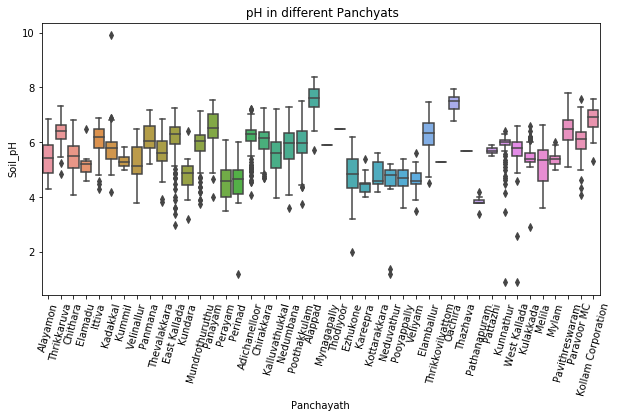

In [33]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Panchayath',y='Soil_pH',data=df)
plt.title(" pH in different Panchyats")
plt.xticks(rotation=75)

# Potassiaum distribution in different panchayaths

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

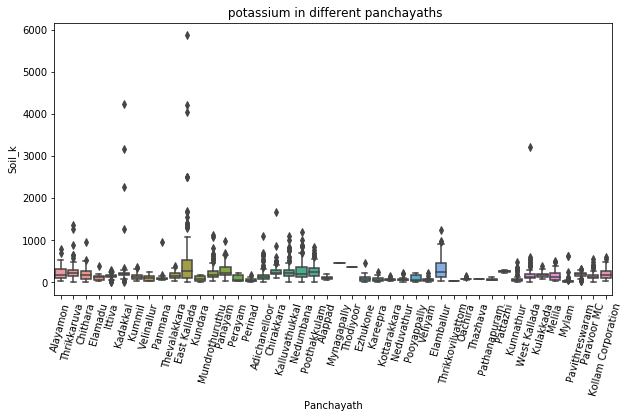

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Panchayath',y='Soil_k',data=df)
plt.title(" potassium in different panchayaths")
plt.xticks(rotation=75)

# Calcium distribution in different panchayaths

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

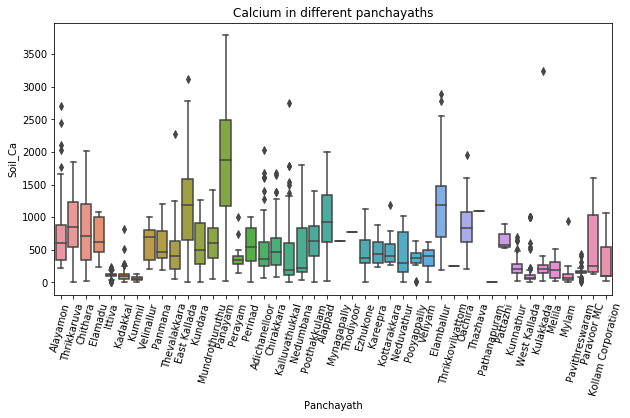

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Panchayath',y='Soil_Ca',data=df)
plt.title("Calcium in different panchayaths")
plt.xticks(rotation=75)

# Manganese distribution in different panchayaths

Text(0.5, 1.0, 'Mangnese distribution')

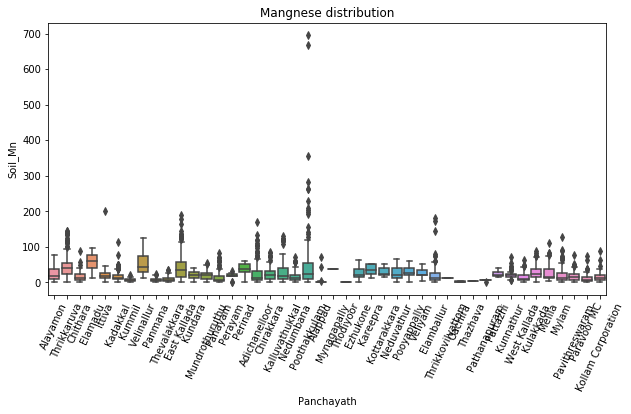

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Panchayath',y='Soil_Mn',data=df)
plt.xticks(rotation=65)
plt.title('Mangnese distribution')

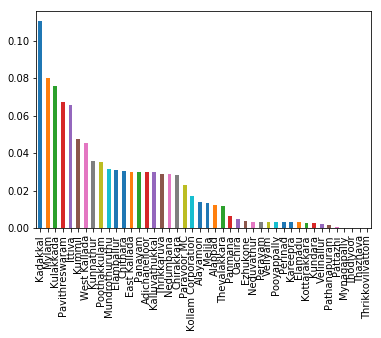

In [38]:
df['Panchayath'].value_counts(normalize=True).plot(kind='Bar')

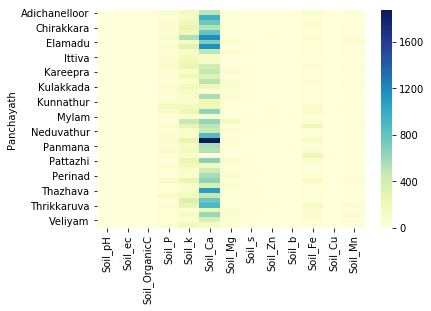

In [39]:
mean=df.groupby('Panchayath')[soil_col].mean()
sns.heatmap(mean,cmap="YlGnBu")

In [41]:
pan_ph=df[['Panchayath','Soil_pH']]

In [42]:
pan_ph.head()

,Panchayath,Soil_pH
0,Alayamon,4.76
1,Alayamon,5.67
2,Alayamon,5.45
3,Alayamon,5.46
4,Alayamon,6.24


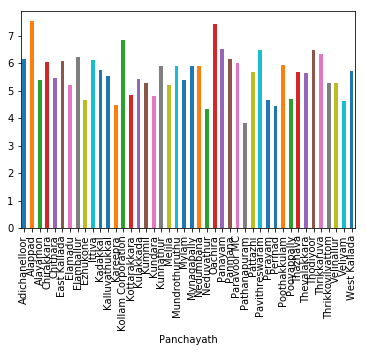

In [43]:
pan_ph.groupby('Panchayath')['Soil_pH'].mean().plot(kind='bar')

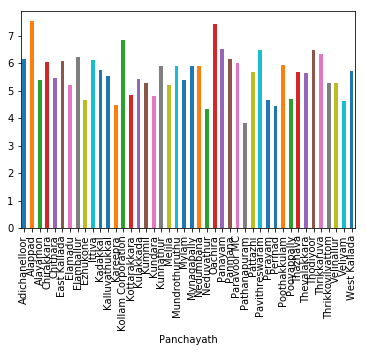

In [48]:
group1_ph=pan_ph.groupby('Panchayath')

In [49]:
group1_ph

In [51]:
#one way anova
stats.f_oneway(group1_ph.groups['Alayamon'],
               group1_ph.groups['Thrikkaruva'],
               group1_ph.groups['Chithara'],group1_ph.groups['Elamadu'],group1_ph.groups['Ittiva'],group1_ph.groups['Kadakkal'],
             group1_ph.groups['Kummil'],group1_ph.groups['Velinallur'],group1_ph.groups['Panmana'],group1_ph.groups['Thevalakkara'])

F_onewayResult(statistic=2447.6506626677005, pvalue=0.0)

# As p value is less than 0.5 we reject null hypothesis

In [52]:

pan_ca=df[['Panchayath','Soil_Ca']]
group1_ca=pan_ca.groupby('Panchayath')

In [53]:
#one way anova
stats.f_oneway(group1_ca.groups['Alayamon'],
               group1_ca.groups['Thrikkaruva'],
               group1_ca.groups['Chithara'],group1_ca.groups['Elamadu'],group1_ca.groups['Ittiva'],group1_ca.groups['Kadakkal'],
             group1_ca.groups['Kummil'],group1_ca.groups['Velinallur'],group1_ca.groups['Panmana'],group1_ca.groups['Thevalakkara'])

F_onewayResult(statistic=2447.6506626677005, pvalue=0.0)

# As p value is less than 0.5 thus we reject null hypothesis

In [54]:
pan_k=df[['Panchayath','Soil_k']]
group1_k=pan_k.groupby('Panchayath')

In [55]:
#one way anova
stats.f_oneway(group1_k.groups['Alayamon'],
               group1_k.groups['Thrikkaruva'],
               group1_k.groups['Chithara'],group1_k.groups['Elamadu'],group1_k.groups['Ittiva'],group1_k.groups['Kadakkal'],
             group1_k.groups['Kummil'],group1_k.groups['Velinallur'],group1_k.groups['Panmana'],group1_.groups['Thevalakkara'])

F_onewayResult(statistic=2447.6506626677005, pvalue=0.0)

# As p value is less than 0.5 thus we reject null hypothesis

# We conclude that soil distribution in different blocks and panchayaths is different as p value is coming less than 0.5